Saving climate_data.csv to climate_data (3).csv


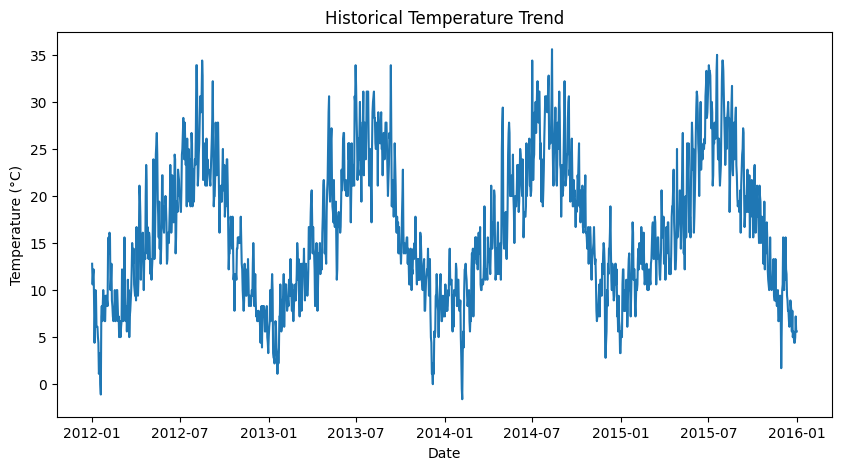

MSE: 58.60677268305992
R2 Score: -0.07024539434653576


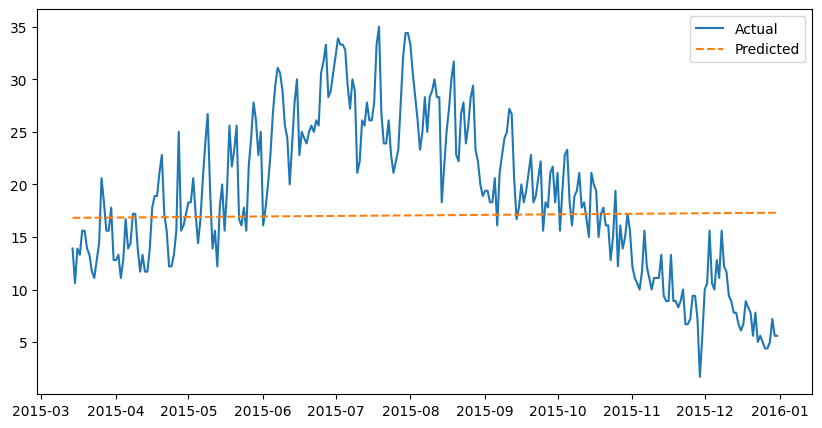

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


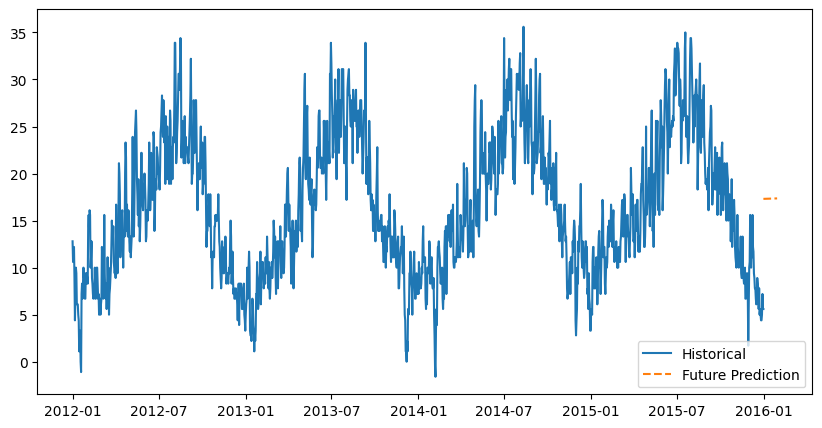

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files
uploaded = files.upload()  # upload your dataset

# Load data
df = pd.read_csv("seattle-weather.csv")
df.head()

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df.set_index('date', inplace=True)

# Plot temperature trend
plt.figure(figsize=(10,5))
plt.plot(df['temp_max'])
plt.title("Historical Temperature Trend")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()
# Create a 'day number' feature
df['Day'] = np.arange(len(df))

X = df[['Day']]
y = df['temp_max']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Plot Actual vs Predicted
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted", linestyle='dashed')
plt.legend()
plt.show()
# Predict next 30 days
future_days = np.arange(len(df), len(df)+30).reshape(-1,1)
future_preds = model.predict(future_days)

# Plot future predictions
plt.figure(figsize=(10,5))
plt.plot(df.index, df['temp_max'], label="Historical")
plt.plot(pd.date_range(df.index[-1], periods=30, freq="D"), future_preds, label="Future Prediction", linestyle='dashed')
plt.legend()
plt.show()